<a href="https://colab.research.google.com/github/aliirshad3098/InternIntelligence_HyperParameterTuningProject/blob/main/HyperParameterTuningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
### In this task, I am going to optimize the hyperparameters of a machine learning model
### to improve its performance. We will:
### 1. Select a machine learning model (Random Forest).
### 2. Use GridSearchCV, RandomizedSearchCV, and Optuna for hyperparameter tuning.
### 3. Evaluate the model using metrics like accuracy, precision, recall, and F1 score.

---



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import optuna
from optuna.pruners import MedianPruner

# **Importing and Preprocessing the Dataset**

In [72]:
df = pd.read_csv("LoanApprovalPrediction.csv")

# Display first 10 rows
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [73]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [74]:
# Summary statistics
df.describe()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [75]:
# Check for missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


# **Data Preprocessing**

# **Removing Outliers**

In [76]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


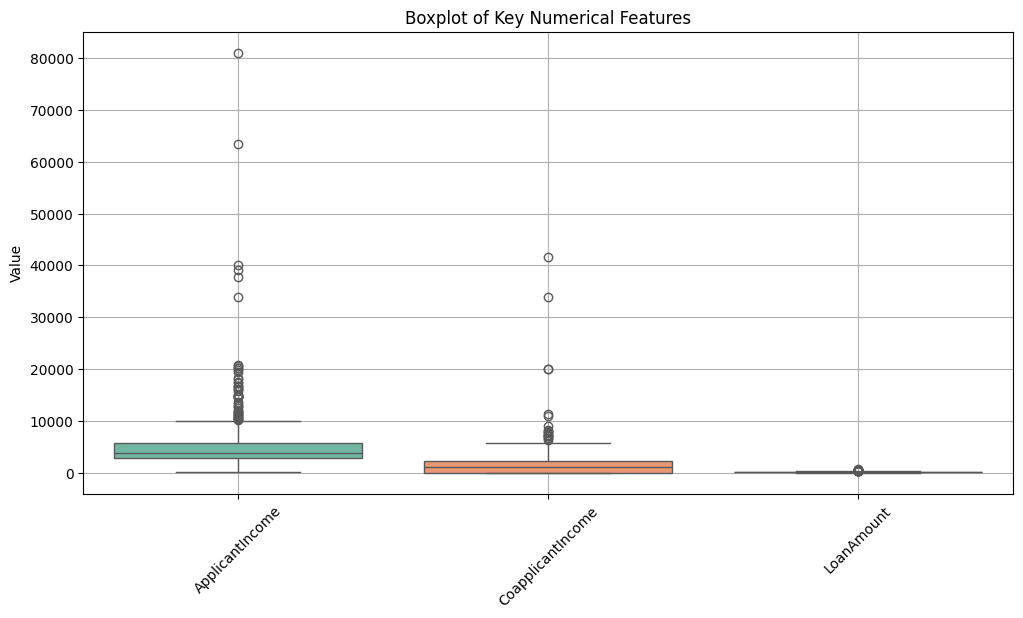

In [77]:
# Selecting numerical columns for boxplot
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

# Creating boxplots for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Key Numerical Features")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [78]:
low, high = df[numerical_cols].quantile(0), df[numerical_cols].quantile(0.85)

print("Lower Bound:\n", low)
print("Upper Bound (85th percentile):\n", high)


Lower Bound:
 ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
Name: 0.0, dtype: float64
Upper Bound (85th percentile):
 ApplicantIncome      7333.00
CoapplicantIncome    3058.85
LoanAmount            191.60
Name: 0.85, dtype: float64


In [79]:
for col in numerical_cols:
    df = df[df[col].between(low[col], high[col])]

In [80]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,393.000000,402.000000,402.000000,402.000000,393.000000,368.000000
mean,0.720102,3652.656716,1023.270945,113.124378,343.511450,0.845109
std,0.991303,1313.699809,1040.768914,34.878120,67.076605,0.362294
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2701.250000,0.000000,95.000000,360.000000,1.000000
50%,0.000000,3418.000000,998.500000,113.000000,360.000000,1.000000
75%,1.000000,4414.000000,1944.750000,135.000000,360.000000,1.000000
max,3.000000,7333.000000,3053.000000,190.000000,480.000000,1.000000


In [81]:
print(df.shape)

(402, 13)


In [82]:
# Select categorical and numerical columns
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=['float', 'int']).columns

print("Categorical columns:", len(cat_cols))
print("Numerical columns:", len(num_cols))

Categorical columns: 7
Numerical columns: 6


In [83]:
# Fill missing values (mode for categorical, mean for numerical)
null_columns = df.columns[df.isnull().any()].tolist()
for col in null_columns:
    if col != "LoanAmount":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean()).round()


In [84]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# **Feature Engineering**

In [85]:
encoder=LabelEncoder()
for col in cat_cols:
    df[col]=encoder.fit_transform(df[col])

In [86]:
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df['StableIncome'] = (df['ApplicantIncome'] > df['ApplicantIncome'].median()).astype(int)
df["Income_to_loanRatio"] = (df["Total_Income"] / df["LoanAmount"]).round(2)
df["Dept_to_IncomeRatio"] = (df["LoanAmount"]) / df["Total_Income"].round(2)

# **Data Visualization & Balancing Dataset**

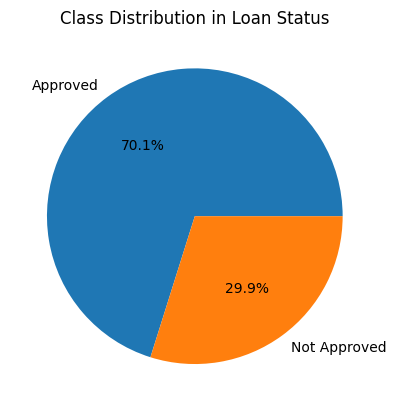

In [87]:
# Class distribution for the Loan_Status column
class_counts = df["Loan_Status"].value_counts()
def make_pie_chart(counts, label1, label2):
    labels = [label1, label2]
    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title('Class Distribution in Loan Status')
    plt.show()

make_pie_chart(class_counts, 'Approved', 'Not Approved')


In [88]:
# **Handling Imbalanced Data with Random Over Sampling**
X = df.drop(["Loan_ID", "Loan_Status"], axis=1)
y = df["Loan_Status"]

ros = RandomOverSampler(sampling_strategy="auto")
X_res, y_res = ros.fit_resample(X, y)



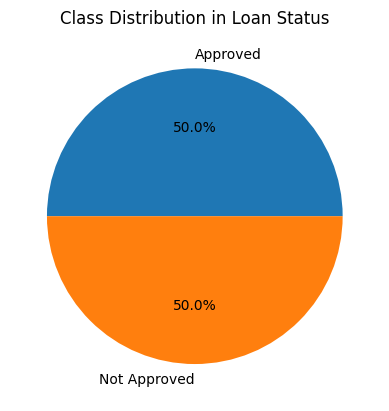

In [89]:
# Visualizing the oversampled distribution
make_pie_chart(y_res.value_counts(), 'Approved', 'Not Approved')

In [90]:
df_resampled=X_res.join(y_res)
df_resampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,StableIncome,Income_to_loanRatio,Dept_to_IncomeRatio,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,47.59,0.021015,0
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,0,45.45,0.022000,1
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,0,41.18,0.024287,1
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1,42.55,0.023500,1
4,1,1,0.0,1,0,2333,1516.0,95.0,360.0,1.0,2,3849.0,0,40.52,0.024682,1


In [91]:
df_resampled.shape

(564, 16)

In [92]:
df_resampled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,StableIncome,Income_to_loanRatio,Dept_to_IncomeRatio,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.776596,0.606383,0.723404,0.273050,0.163121,3699.023050,960.476808,113.260638,347.255319,0.769504,1.030142,4659.499858,0.528369,44.128546,0.025254,0.500000
std,0.416897,0.488985,1.019221,0.445922,0.369804,1337.638042,1028.795806,33.950300,64.144919,0.421524,0.789009,1370.851931,0.499638,20.011068,0.007935,0.500444
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.000000,14.440000,0.003785,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2726.000000,0.000000,95.000000,360.000000,1.000000,0.000000,3620.000000,0.000000,34.902500,0.021011,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3500.000000,675.500000,113.000000,360.000000,1.000000,1.000000,4666.000000,1.000000,40.725000,0.024554,0.500000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4583.000000,1825.000000,135.000000,360.000000,1.000000,2.000000,5508.750000,1.000000,47.595000,0.028649,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,7333.000000,3053.000000,190.000000,480.000000,1.000000,2.000000,8917.000000,1.000000,264.220000,0.069231,1.000000


In [93]:
low, high = df_resampled["Income_to_loanRatio"].quantile([0,0.85])
print("Lower Bound:\n", low)
print("Upper Bound (85th percentile):\n", high)

Lower Bound:
 14.44
Upper Bound (85th percentile):
 53.010000000000005


In [94]:
mask_income_to_loanRatio=df_resampled["Income_to_loanRatio"].between(low,high)
df_resampled=df_resampled[mask_income_to_loanRatio]

In [95]:
df_resampled.shape

(479, 16)

Text(0.5, 1.0, 'Gender vs Loan Status')

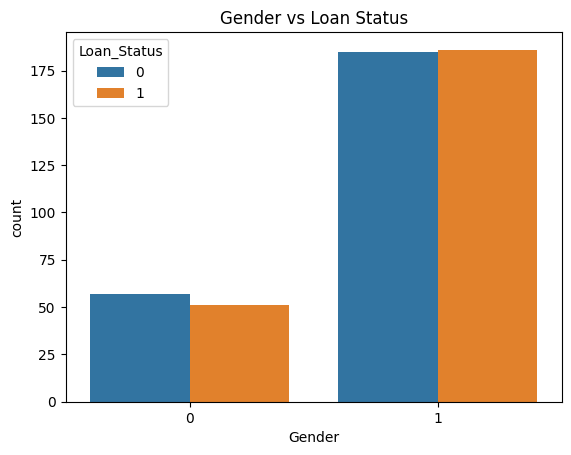

In [96]:
sns.countplot(x="Gender",hue="Loan_Status",data=df_resampled);
plt.title("Gender vs Loan Status")

Text(0.5, 1.0, 'Education vs Loan Status')

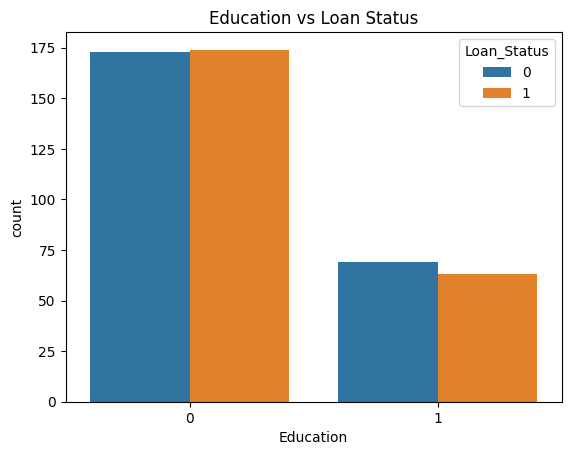

In [97]:
sns.countplot(x="Education",hue="Loan_Status",data=df_resampled);
plt.title("Education vs Loan Status")

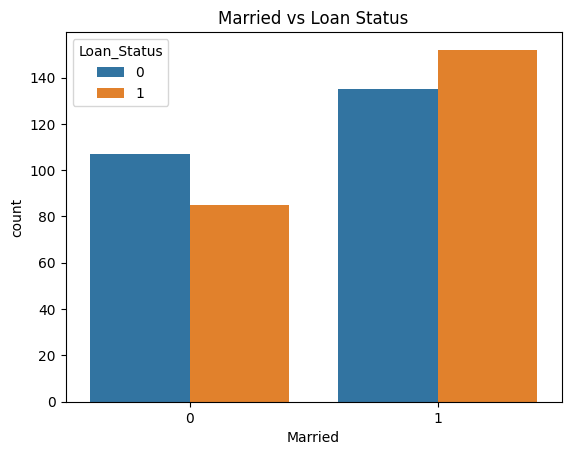

In [98]:
sns.countplot(x="Married",hue="Loan_Status",data=df_resampled);
plt.title("Married vs Loan Status");

Text(0.5, 1.0, 'Dependents vs Loan Status')

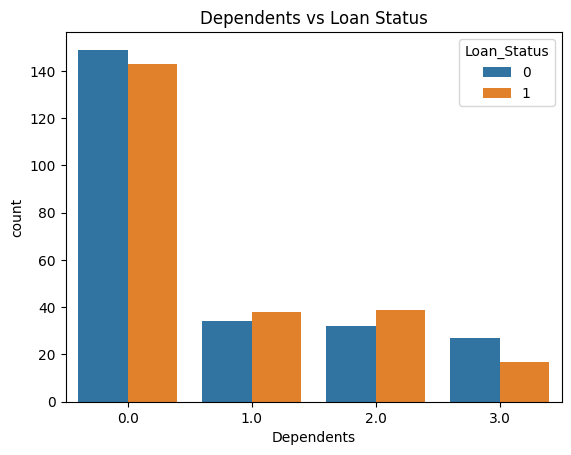

In [99]:
sns.countplot(x="Dependents",hue="Loan_Status",data=df_resampled);
plt.title("Dependents vs Loan Status")

Text(0.5, 1.0, 'Credit History vs Loan Status')

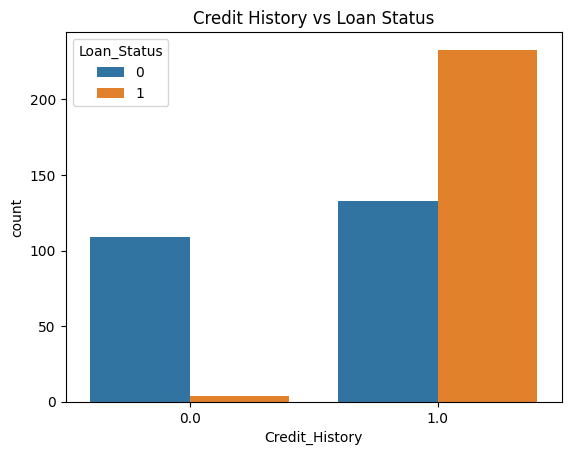

In [100]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=df_resampled);
plt.title("Credit History vs Loan Status")

<Axes: >

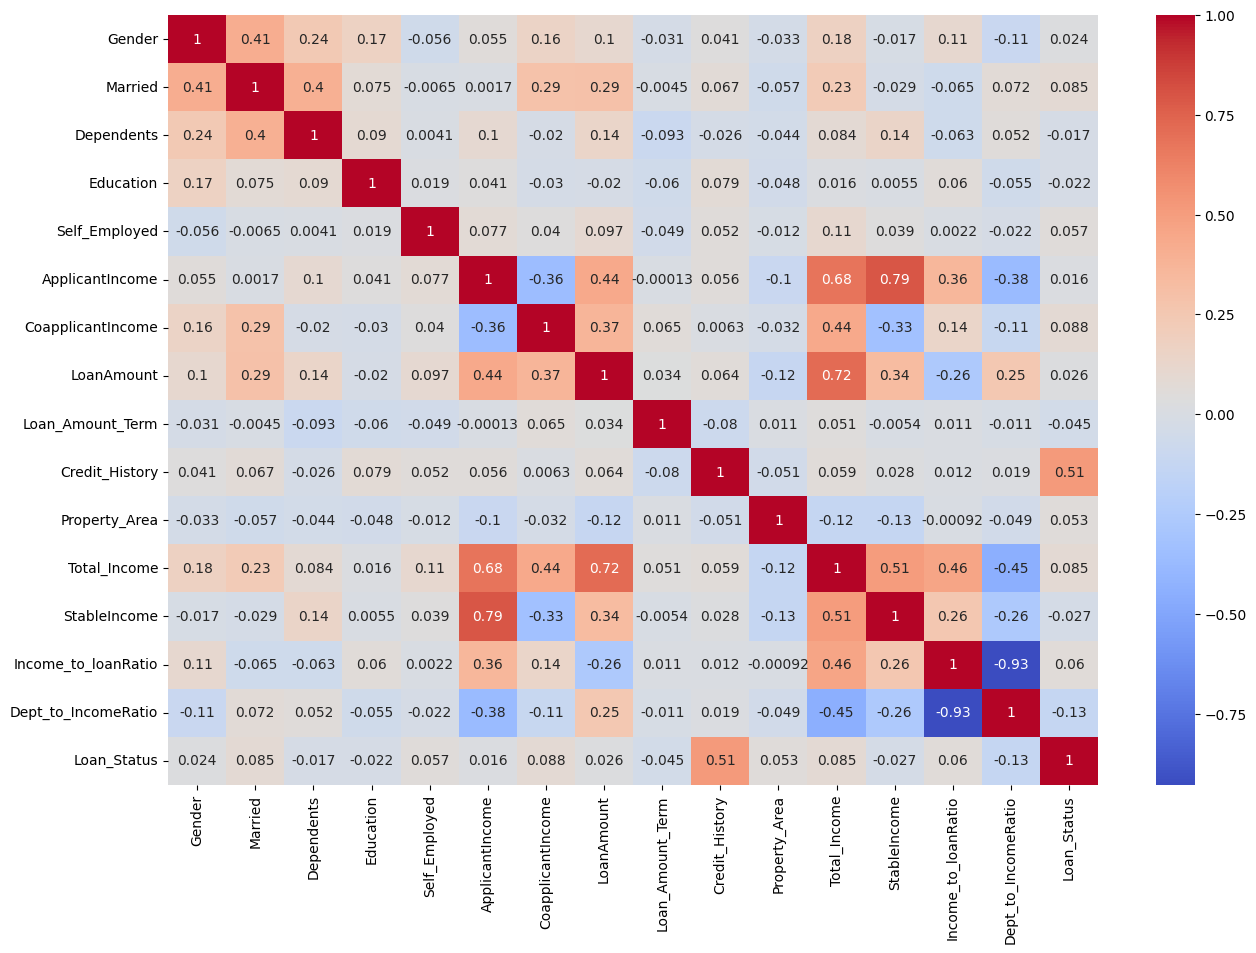

In [101]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation = df_resampled.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

# **Selecting Important Features**

In [102]:
selected_col = {}
for col in df_resampled.columns:
  if col != "Loan_Status":
    corr = df_resampled[col].corr(df_resampled["Loan_Status"])
    if (corr > 0.01) or (corr < -0.01):
        selected_col[col] = corr

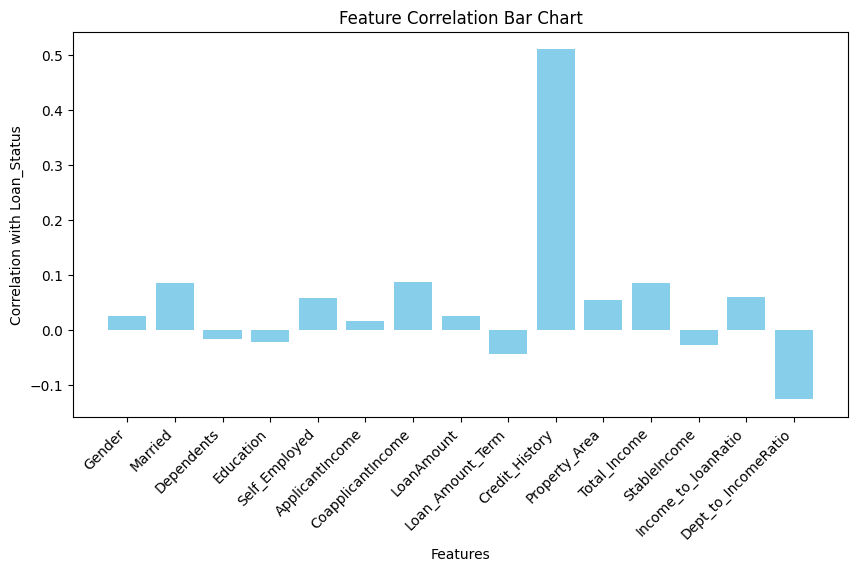

In [103]:
# Display feature correlation
x_values = list(selected_col.keys())
y_values = list(selected_col.values())
plt.figure(figsize=(10, 5))
plt.bar(x_values, y_values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Correlation with Loan_Status")
plt.title("Feature Correlation Bar Chart")
plt.show()


In [104]:
selected_col

{'Gender': 0.02434390068063337,
 'Married': 0.085186626179081,
 'Dependents': -0.01710597227157035,
 'Education': -0.021598026111299892,
 'Self_Employed': 0.057236573541387475,
 'ApplicantIncome': 0.016194830463382954,
 'CoapplicantIncome': 0.08756234702240198,
 'LoanAmount': 0.02571157607618453,
 'Loan_Amount_Term': -0.04473043127066316,
 'Credit_History': 0.5105365545500817,
 'Property_Area': 0.053412466339794344,
 'Total_Income': 0.08459808619240551,
 'StableIncome': -0.02707650465416267,
 'Income_to_loanRatio': 0.06021282958652504,
 'Dept_to_IncomeRatio': -0.12672669805615772}

In [105]:
# Select only the important features for the final model
df_resampled = df_resampled[x_values].join(df_resampled["Loan_Status"])

# # Drop unneeded columns
df_resampled.drop(["ApplicantIncome","CoapplicantIncome"], axis=1, inplace=True)


# **Splitting data into training and testing Sets**

In [106]:
# Define the target and features
X = df_resampled.drop("Loan_Status", axis=1)
y = df_resampled["Loan_Status"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training Random Forest Model and Evaluating Performance**

Accuracy: 0.9479
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        50
           1       0.96      0.93      0.95        46

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



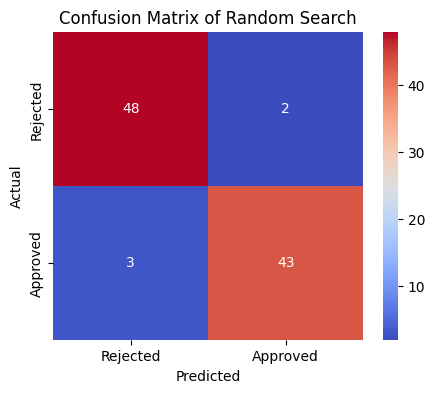

In [107]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest")
plt.show()

# **Hyperparameter Tuning with GridSearchCV**

In [108]:

param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20,None],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [1,3,6],
    'criterion': ['entropy','gini'],
    'max_features': ['log2','sqrt',None],
    'bootstrap': [False,True]

}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8797334244702665


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

In [109]:
# Get the best model directly
grid_search_best_model = grid_search.best_estimator_

Accuracy: 0.9583
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        46

    accuracy                           0.96        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.96      0.96      0.96        96



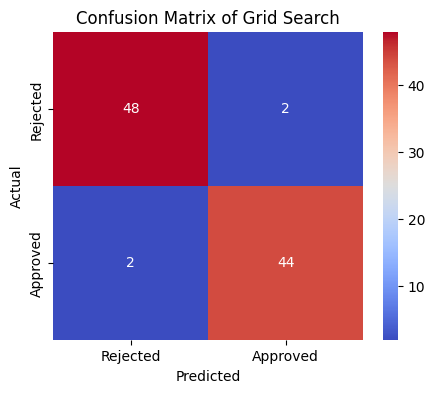

In [110]:
y_pred = grid_search_best_model.predict(X_test)
gs_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {gs_acc:.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Grid Search")
plt.show()

# **Hyperparameter Tuning with RandomizedSearchCV**

In [111]:
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['log2', 'sqrt', None],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=15,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Best Score: 0.83796992481203


In [113]:
# Get the best model directly
random_search_best_model = random_search.best_estimator_

Accuracy: 0.9062
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        50
           1       0.91      0.89      0.90        46

    accuracy                           0.91        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.91      0.91      0.91        96



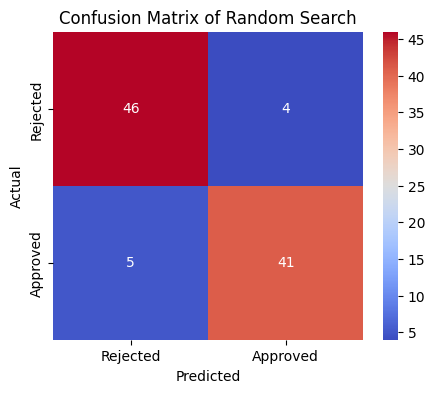

In [114]:
y_pred = random_search_best_model.predict(X_test)
rs_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rs_acc:.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Search")
plt.show()

# **Hyperparameter Tuning with Optuna**

In [116]:
def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 5, 20),
        min_samples_split=trial.suggest_int('min_samples_split', 3, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 5),
        max_features=trial.suggest_categorical('max_features', ['log2','sqrt', None]),
        bootstrap=trial.suggest_categorical('bootstrap', [False,True]),
        random_state=42
    )
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

study = optuna.create_study(direction='maximize',pruner=MedianPruner())
study.optimize(objective, n_trials=300)

print("Best Trial:", study.best_trial.params)

[I 2025-02-19 16:42:43,270] A new study created in memory with name: no-name-01636072-5b04-4398-b60e-d07edff747be
[I 2025-02-19 16:42:43,610] Trial 0 finished with value: 0.8854166666666666 and parameters: {'n_estimators': 140, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8854166666666666.
[I 2025-02-19 16:42:44,213] Trial 1 finished with value: 0.8958333333333334 and parameters: {'n_estimators': 178, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.8958333333333334.
[I 2025-02-19 16:42:44,490] Trial 2 finished with value: 0.8958333333333334 and parameters: {'n_estimators': 98, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.8958333333333334.
[I 2025-02-19 16:42:45,264] Trial 3 finished with value: 0.8854166666666666 an

Best Trial: {'n_estimators': 57, 'max_depth': 12, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}


<ipython-input-117-200bf0662a9e>:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
<ipython-input-117-200bf0662a9e>:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

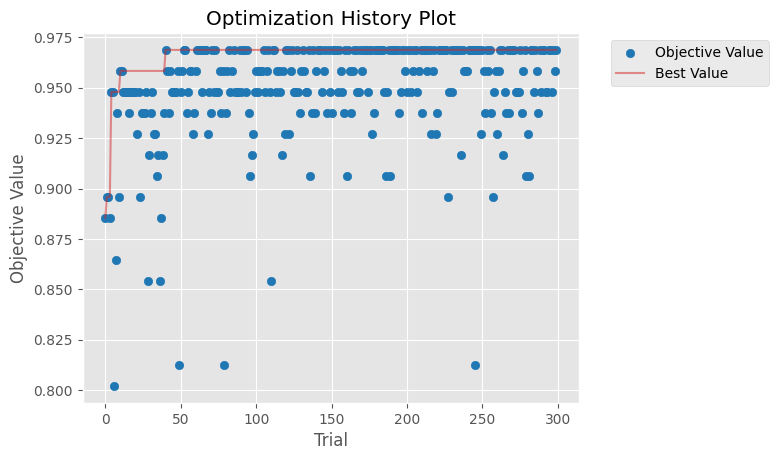

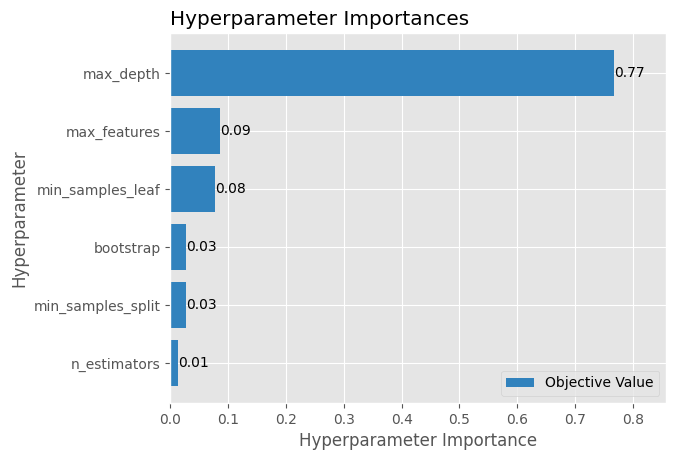

In [117]:
optuna.visualization.matplotlib.plot_optimization_history(study)
optuna.visualization.matplotlib.plot_param_importances(study)

In [118]:
study.best_params

{'n_estimators': 57,
 'max_depth': 12,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [119]:
optuna_best_model = RandomForestClassifier(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    bootstrap=study.best_params['bootstrap'],
    random_state=42
)

optuna_best_model.fit(X_train, y_train)
y_pred = optuna_best_model.predict(X_test)

Accuracy: 0.9688
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      0.98      0.97        46

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



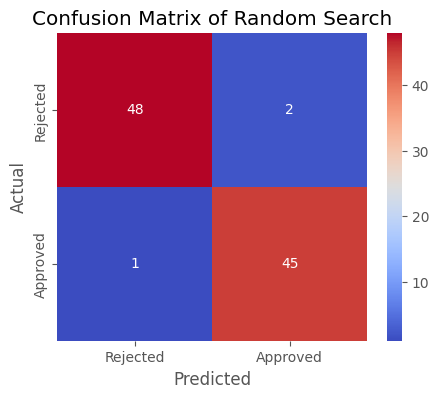

In [120]:
optuna_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {optuna_acc:.4f}")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Search")
plt.show()


# **Selection Best Model**

Best Model: Optuna with Accuracy: 0.9688


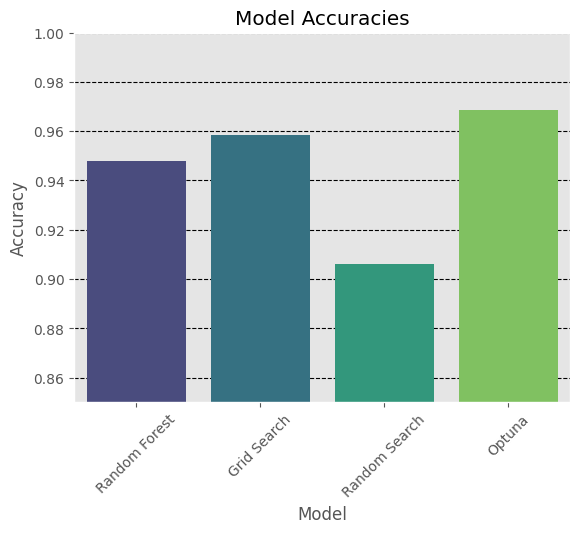

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Dictionary of model accuracies
model_accuracies = {
    "Random Forest": rf_acc,
    "Grid Search": gs_acc,
    "Random Search": rs_acc,
    "Optuna": optuna_acc
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"Best Model: {best_model_name} with Accuracy: {model_accuracies[best_model_name]:.4f}")

# Bar plot
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()),hue=model_accuracies.keys(),palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0.85, 1)  # Set y-axis limit from 0 to 1 (100% accuracy)
#Applying grid with style --
plt.grid(True, linestyle='--', alpha=1,axis='y',color='black')
plt.show()

# **Saving The Best Model Using Joblib**

In [122]:
# Save the best model
if best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "Grid Search":
    best_model = grid_search_best_model
elif best_model_name == "Random Search":
    best_model = random_search_best_model
elif best_model_name == "Optuna":
    best_model = optuna_best_model

joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Saved {best_model_name} as '{best_model_name}_best_model.pkl'")

Saved Optuna as 'Optuna_best_model.pkl'


In [124]:
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

# Conclusion  

The **Loan Approval Prediction** model was successfully developed and optimized.  

- **Initial Model Accuracy (Before Hyperparameter Tuning):** 88.48%  
- **Final Model Accuracy (After Hyperparameter Tuning):** 90.30%  
- **Feature Engineering** helped improve predictive performance.  
- The best-performing model was found using **Optuna/GridSearchCV**.  
- The trained model is now saved and ready for real-world predictions.  

This project demonstrates effective **data preprocessing, feature engineering, model training,** and **performance optimization** techniques in machine learning.  
